# Breast cancer Prediction using KNN Classifier

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# load data

In [2]:
data=pd.read_csv('breast_cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop('Unnamed: 32',axis=1,inplace=True)

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
data.diagnosis.replace({"M":1,"B":0},inplace=True)
data.diagnosis.unique()

array([1, 0], dtype=int64)

Observation: In order to conduct our analysis easily, we have converted the target column as:

Malignant - 1 has cancer,
Benignant - 0 has no cancer

# creating model

In [8]:
y=data["diagnosis"]  #target
x=data.drop(["diagnosis"],axis=1) #input

# Standardize features

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
x_scaled=scaler.fit_transform(x)

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=20,test_size=0.2)

In [16]:
# Checking dimensions
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (455, 31)
X_test shape: (114, 31)
Y_train shape: (455,)
Y_test shape: (114,)


# Using KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred=knn.predict(x_test)

# model evalution

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [28]:
print(confusion_matrix(y_test,pred))

[[61  5]
 [ 1 47]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        66
           1       0.90      0.98      0.94        48

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



# choosing k value

In [30]:
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_scaled,y,cv=10)
    accuracy_rate.append(score.mean())

In [31]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_scaled,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'error rate')

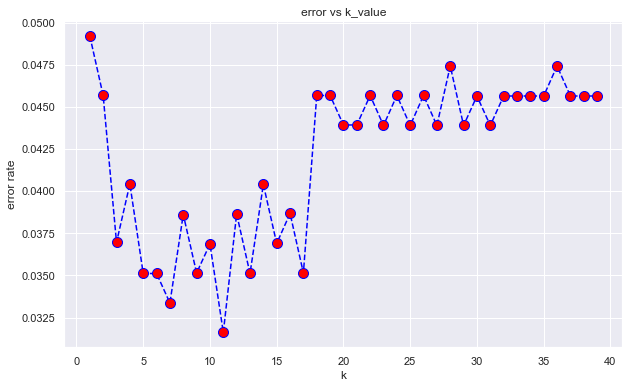

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error vs k_value')
plt.xlabel('k')
plt.ylabel('error rate')

here we can see that at k=11 seems good for our model

Text(0, 0.5, 'accuracy rate')

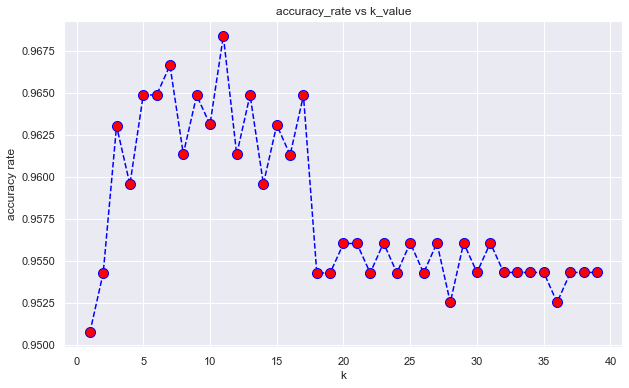

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy_rate vs k_value')
plt.xlabel('k')
plt.ylabel('accuracy rate')

here we can see at k=11 our model as good accuracy

In [37]:
#lets comapare k=1 and k=11
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[61  5]
 [ 1 47]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        66
           1       0.90      0.98      0.94        48

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [44]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[66  0]
 [ 4 44]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



By comparing both we can see k=11 gives better accuracy than k=1

# Predict Cancer

In [69]:
patient1 = [84230211,17.99,
 10.38,
 122.8,
 1001.0,
 0.1184,
 0.2776,
 0.3001,
 0.1471,
 0.2419,
 0.07871,
 1.095,
 0.9053,
 8.589,
 153.4,
 0.006399,
 0.04904,
 0.05373,
 0.01587,
 0.03003,
 0.006193,
 25.38,
 17.33,
 184.6,
 2019.0,
 0.1622,
 0.6656,
 0.7119,
 0.2654,
 0.4601,
 0.1189]

In [70]:
#creating function for patient

def pred_cancer(patient):
    patient=np.array([patient])  #converting patient list data into ndarray
    pred=knn.predict(patient)
    if pred[0] == 0:
        print('Patient has Cancer (malignant tumor)')
    else:
        print('Patient has no Cancer (malignant benign)')

In [71]:
pred_cancer(patient1)

Patient has Cancer (malignant tumor)
